# Exploratory Data Analysys 
## TOP 1000 IMDB MOVIES
#### Autor: [Alberto Lara Buendía](https://www.linkedin.com/in/alarab/)

***

### Introducción

Con motivo del proyecto EDA para el bootcamp de Data Science en The Bridge, realizaremos un análisis exploratorio de datos de tema libre.
En el proyecto debemos encontrar una fuente de datos, trataremos estos datos y sacaremos conclusiones en base a los mismos. 
Todo esto se hará con lenguage Pyhton, utilizando librerías como Pandas, Numpy, Matplotlib, Seaborn y Plotly, entre otras.

### Fuente de datos
Utilizaremos un archivo CSV encontrado en la web Kaggle, que contiene información sobre las 1000 primeras películas en el ranking de IMDB. (Internet Movie Database)

### Descripción de los datos
El dataset nos ofrece datos en texto como el título de las películas, una breve sinópsis y el cásting.
También encontramos datos númericos como la puntuación de los usuarios,
el metascore (puntuación de profesionales), año de publicación de cada película y recaudación mundial en USD.

### ¿Qué queremos analizar?
Vamos a intentar descubrir qué carácteristicas tiene que tener una película para entrar este ranking.
También, analizaremos a fondo las que más recaudan y veremos por qué.

***

 <a name="indice"></a> 
 
 ### INDICE

- [1. Limpieza de datos](#1.-Limpieza-de-datos)
- [2. Películas con el paso de los años](#2.-Películas-con-el-paso-de-los-años)
- [3. Recaudación](#3.-Recaudación) 
- [4. Duración de las películas](#4.-Duración-de-las-películas)
- [5. Análisis por género](#5.-Análisis-por-género)
- [6. ¿Cómo se puntuan los géneros?](#6.-¿Cómo-se-puntuan-los-géneros?)
- [7. TOP 10 por recaudación](#7.-TOP-10-por-recaudación)
- [8. Tratamiento de texto](#8.-Tratamiento-de-texto)
- [9. Conclusión final](#9.-Conclusión-final)
 

 




In [1]:
#Importo librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import SequenceMatcher
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)
import random
from random import randint
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify

In [2]:
#Importo datasets

data_imdb = pd.read_csv("imdb_top_1000.csv", error_bad_lines=False)

In [3]:
#Creo dataframes y vemos qué aspecto tiene

df_imdb = pd.DataFrame(data_imdb)
df_imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 1. Limpieza de datos

Tras ver el aspecto de nuestro dataset, vamos a realizar una limpieza de datos de cara a comprenderlo mejor y **optimizar el análisis**.

En cuanto a las **columnas**, cambiaremos su nombre y eliminamos las que no nos sirven.
La columna 'year' es un objeto, porque en una de filas hay un string, de modo que aplicamos una máscara para encontrarla y la eliminamos.

En cuanto a las **filas**, encontramos valores nulos. Si los sustituimos por '0' nos viciaría el análisis, y sustituirlo por promedios nos daría valores irreales en algunas gráficas donde queremos sacar rankings, de modo que las eliminamos enteras.

Limpiamos las columnas duración y recaudación, para pasarlas despues a dato numérico.

Por último, la columna 'Género' nos devuelve hasta 3 palabras (Genero, subgenero1 y subgenero2), la limpiamos y nos quedamos con el género principal.






In [4]:
#Cambio nombre de las columnas

df_imdb.columns = ['Link', 'Titulo', 'year', 'certificado', 'duracion', 'genero', 'rating', 'sinopsis', 'metascore', 'director', 'star1', 'star2', 'star3', 'star4','votos','recaudacion']


In [5]:
#Elimino columnas que no me sirven para el análisis

df_imdb.drop(columns = ['Link', 'sinopsis'], inplace = True)


In [6]:
#Reseteo el indice para seguir limpiando
df_imdb.reset_index()

,index,Titulo,year,certificado,duracion,genero,rating,metascore,director,star1,star2,star3,star4,votos,recaudacion
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [7]:
#Tengo una fila con datos incorrectos en 'YEAR', aplico una máscara para saber su índice y eliminarla del dataframe.

mask = df_imdb['year'] == 'PG'
df_imdb[mask].index

df_imdb.drop([966], inplace = True)


In [8]:
#Elimino filas con Nans

df_imdb = df_imdb.dropna()

In [9]:
# Limpio la columna 'duración y paso los datos a float.

limpiar= lambda x: x.replace("min", "").replace(" ", "")

df_imdb['duracion'] = df_imdb['duracion'].apply(limpiar)

df_imdb['duracion'] = df_imdb['duracion'].astype("float64")

In [10]:
# Limpio la columna 'recaudación y paso los datos a float.

limpiar= lambda x: x.replace(",", "").replace(" ", "")

df_imdb['recaudacion'] = df_imdb['recaudacion'].apply(limpiar)

df_imdb['recaudacion'] = df_imdb['recaudacion'].astype("float64")


In [11]:
#Vemos que la columna 'genero' nos puede devolver hasta 2 subgeneros.

df_imdb['genero']

0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
990             Drama, War, Western
991          Adventure, Comedy, War
992    Animation, Adventure, Family
994          Comedy, Music, Musical
997             Drama, Romance, War
Name: genero, Length: 713, dtype: object

In [12]:
#Limpio los subgeneros y dejo la columna con un solo string como género principal.

separado = df_imdb["genero"].str.split(",", n=1, expand=True)

df_imdb["genero_ok"]= separado[0]

df_imdb.drop(columns =["genero"], inplace = True)

In [13]:
#sacamos los primeros datos

df_imdb.describe()

,duracion,rating,metascore,votos,recaudacion
count,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02
mean,123.692847,7.937588,77.158485,3.562568e+05,7.837989e+07
std,25.898509,0.293211,12.409849,3.541346e+05,1.150031e+08
min,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,104.000000,7.700000,70.000000,9.582600e+04,6.153939e+06
50%,120.000000,7.900000,78.000000,2.363110e+05,3.470029e+07
75%,136.000000,8.100000,86.000000,5.084170e+05,1.023089e+08
max,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [14]:
#Busco correlaciones entre los numéricos.

df_imdb.corr()

,duracion,rating,metascore,votos,recaudacion
duracion,1.000000,0.259552,-0.005708,0.213943,0.168261
rating,0.259552,1.000000,0.281135,0.623351,0.127510
metascore,-0.005708,0.281135,1.000000,0.029741,-0.014793
votos,0.213943,0.623351,0.029741,1.000000,0.545455
recaudacion,0.168261,0.127510,-0.014793,0.545455,1.000000


### Correlaciones

Buscaremos correlacciones entre todos los datos numéricos. 

Vamos a ver que no hay correlacciones muy precisas, pero los datos son interesantes.

Descubrimos que no hay correlacion entre rating y recaudación, incluso vemos que las dos mejores películas de la historia tienen una recaudación muy humilde en comparación con la media.

Por otro lado, al comparar el rating de usuarios con el de expertos, vemos que los usuarios son mucho más exigentes a la hora de votar estas películas.



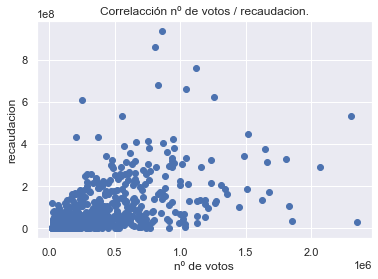

In [15]:
#Correlacción nº de votos / recuadacion

x = df_imdb['votos']
y = df_imdb['recaudacion']

plt.plot(x, y, 'o')
plt.title('Correlacción nº de votos / recaudacion.')
plt.xlabel('nº de votos')
plt.ylabel('recaudacion');

plt.show()



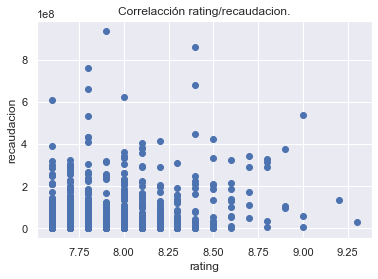

In [16]:
#Correlacción rating / recaudacion

x = df_imdb['rating']
y = df_imdb['recaudacion']

plt.plot(x, y,'o')
plt.title('Correlacción rating/recaudacion.')
plt.xlabel('rating')
plt.ylabel('recaudacion');

plt.show()


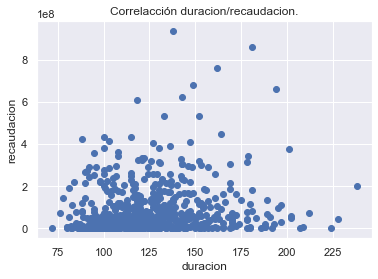

In [17]:
#Correlacción duracion / recaudacion

x = df_imdb['duracion']
y = df_imdb['recaudacion']

plt.plot(x, y,'o')
plt.title('Correlacción duracion/recaudacion.')
plt.xlabel('duracion')
plt.ylabel('recaudacion');

plt.show()

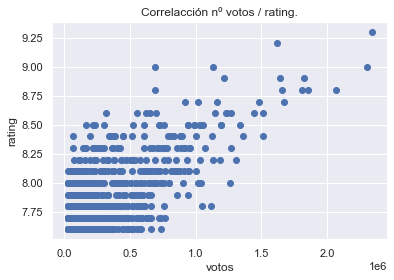

In [18]:
#Correlacción nº votos / rating

x = df_imdb['votos']
y = df_imdb['rating']

plt.plot(x, y,'o')
plt.title('Correlacción nº votos / rating.')
plt.xlabel('votos')
plt.ylabel('rating');

plt.show()

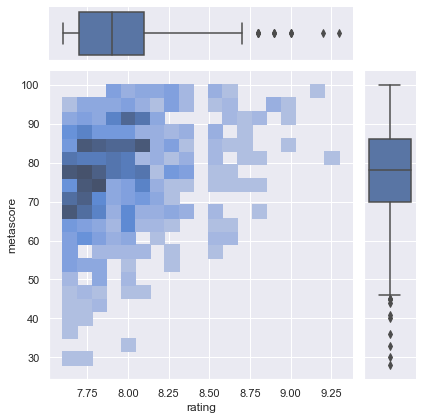

In [19]:
#¿Cómo se distribuyen los votos de usuarios vs metascore?

g = sns.JointGrid(data=df_imdb, x="rating", y="metascore")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot);

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 2. Películas con el paso de los años

Como es obvio, **cada vez se hace más cine** y es por eso que crece casi exponencialmente el peso de peliculas por año en el ranking 1000 de IMDB.

En la primera gráfica, vemos que en estas últimas dos decadas, a pesar de ser los datos más altos, **hay una tendencia negativa**.
Recordemos que esto es un ranking top 1000, donde entran y salen películas en funcion de las votaciones. Ahora hay mucho más cine y es logico ver muchas peliculas
actuales, en contra partida, de entre tantas películas actuales, no todas pueden competir contra las mejores de la historia.

En la segunda gráfica vemos una **caida a partir de 2007**, esto se debe a la huelga de gionistas, donde se crearon muchas menos películas.
**El pico más alto se encuentra en 2014**, justo antes de la llegada de las plataformas de streaming a Estados Unidos (Grueso de los usuarios y críticos de IMDB),
lo cual implica, como hemos visto, debido al reparto de presupuesto de las productoras, más cine y de menor calidad.



C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



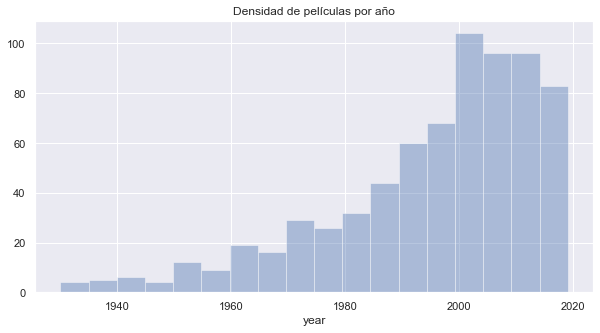

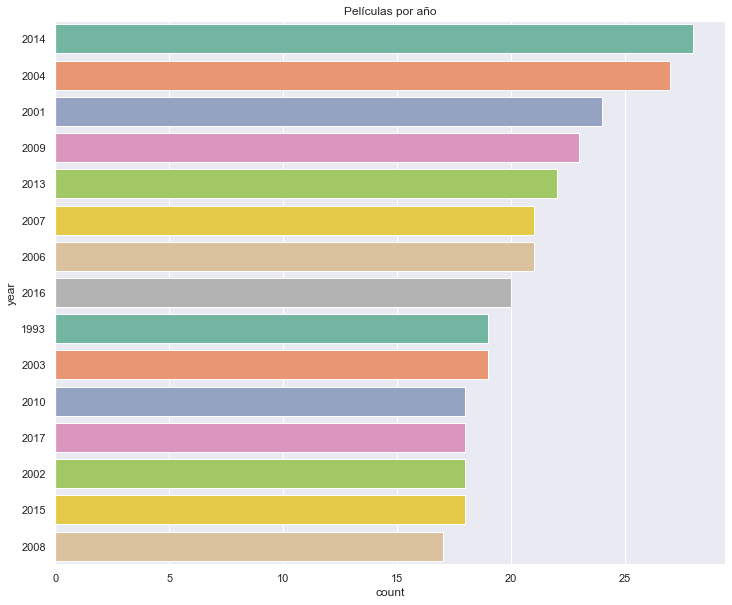

In [20]:
#En qué época se situan más películas?

plt.figure(figsize=(10,5))
sns.distplot(df_imdb['year'], kde = False, color = 'b', x=df_imdb['year'])
plt.title('Densidad de películas por año')

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=df_imdb, palette="Set2", order=df_imdb['year'].value_counts().index[0:15])
plt.title('Películas por año');

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 3. Recaudación

El grueso de la recaudación mundial por película se concentra generalmente en un **rango de entre 60 y 70 millones de USD**, teniendo en cuenta que el crecimiento de peliculas por año es prácticamente exponencial, tendría sentido que la media se situase más en el centro, debido a la inflacción y a que el cine tiene más presupuesto con el paso de los años, sin embargo vemos que en este top 1000, todas recaudan parecido a excepción de unos pocos outlyers.

¿Tendrá que ver con la llegada de internet, la piratería y plataformas de streaming? 
Quizás un poco, pero principalmente es que en las top 1000 peliculas según IMDB, recaudar mucho no significa mejor película.


C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\alber\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



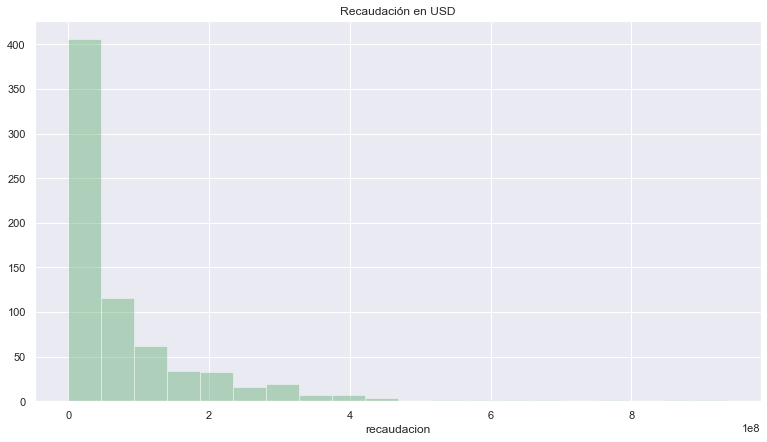

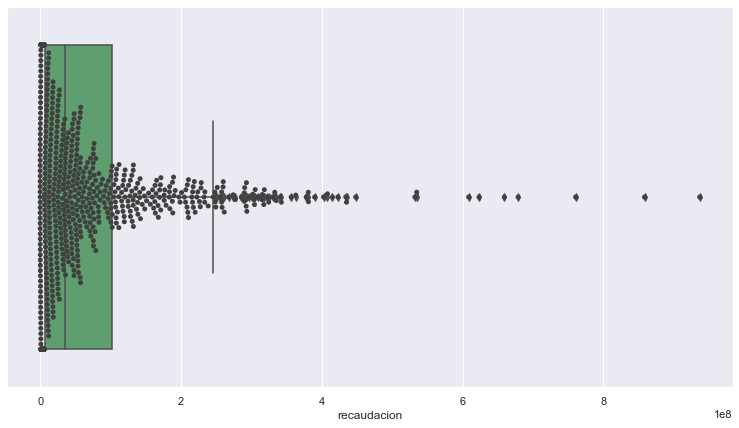

In [21]:
#Recaudación en USD

plt.figure(figsize=(13,7))
sns.distplot(df_imdb['recaudacion'], kde = False, color = 'g', bins=20)
plt.title('Recaudación en USD')

plt.figure(figsize=(13,7))
sns.boxplot(df_imdb['recaudacion'], color = 'g')
ax = sns.swarmplot(x=df_imdb['recaudacion'], data=df_imdb, color=".25");

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 4. Duración de las películas

La duración media de las películas se situa en **123 minutos**.

A excepcion de unos pocos outlayers, vemos un promedio muy  centrado. Es obvio que está muy estudiado que una película exitosa, debe durar en torno a 2h.

C:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



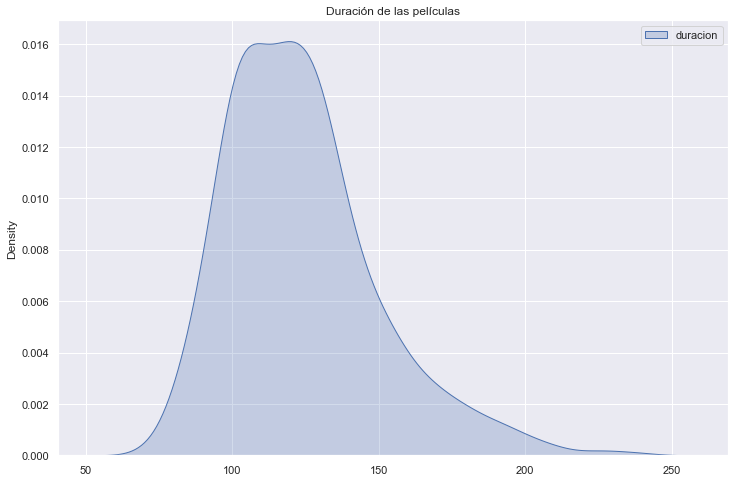

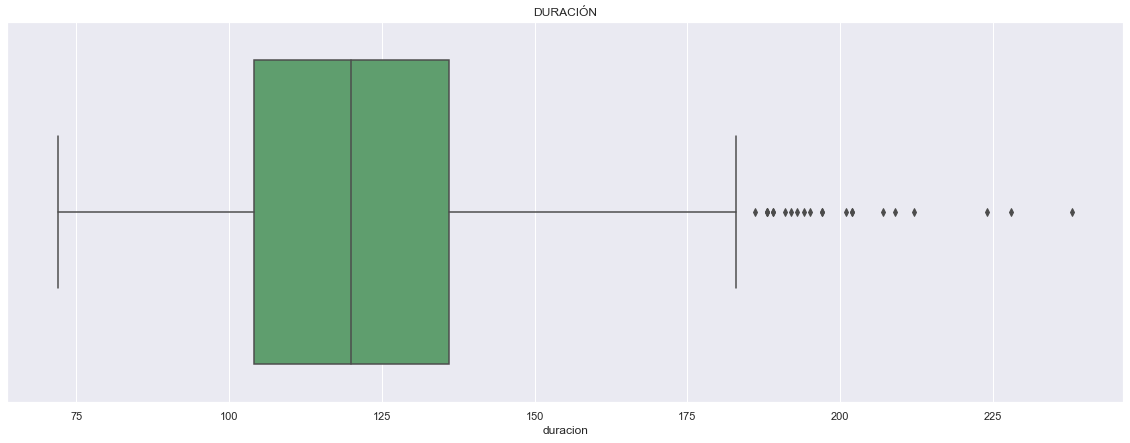

In [22]:
#Duración de las películas
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_imdb[df_imdb.columns[0:4]],
           shade = True)
plt.title('Duración de las películas')


plt.figure(figsize=(20,7))
sns.boxplot(df_imdb['duracion'], color = 'g')
plt.title('DURACIÓN');

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 5. Análisis por género

Primero analizamos los géneros que más aparecen en nuestro dataset. Por mayoría vemos que el género **'Drama'** funciona muy bien y se ve reflejado.
Sin embargo, queremos bajar más al detalle y queremos ver si por aparecer más, significa que es el género que más recauda.

En la segunda gráfica, hemos tomado los datos de los 3 géneros que más aparecen. Sorprendentemente, **'Acción'**, a pesar de tener mucha menos representación que 'Drama', **recauda mucho más**. No obstante son películas más costosas y no sabemos realmente el margen final que genera cáda película.

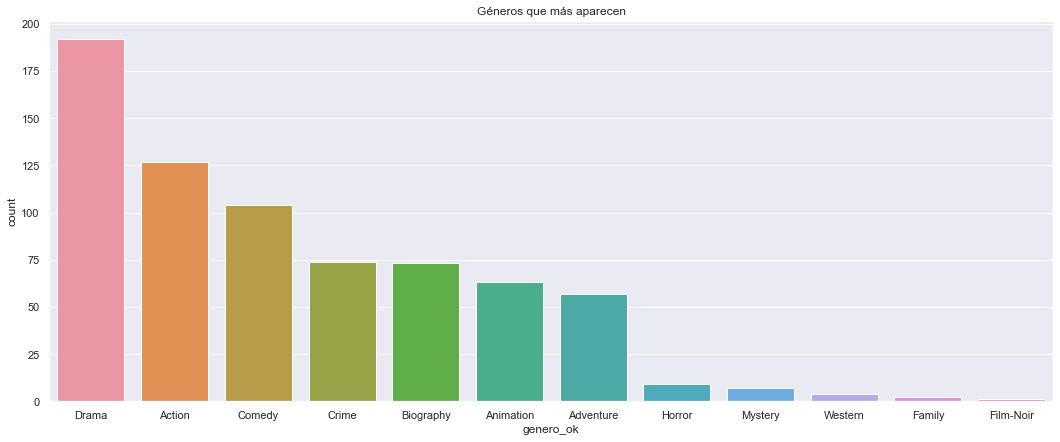

In [23]:
#Cual es el género más habitual?

fig, ax = plt.subplots(figsize=(18,7))
fig = sns.countplot(x = df_imdb['genero_ok'], ax=ax, order = df_imdb['genero_ok'].value_counts().index)
plt.title('Géneros que más aparecen');


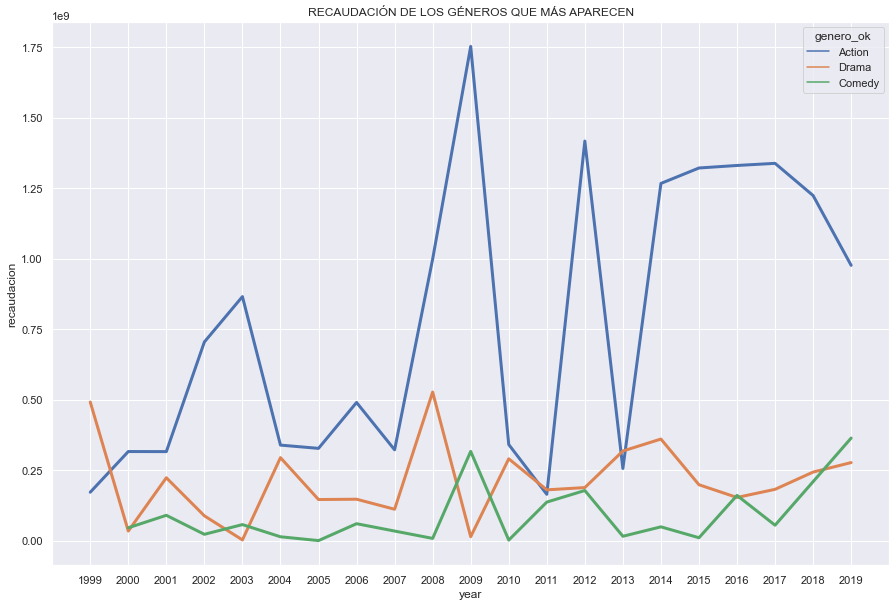

In [24]:
#Recaudacion por los 3 generos más importantes

df_imdb2 = df_imdb[df_imdb['genero_ok'].isin(['Drama', 'Action', 'Comedy'])]
df_imdb2 = df_imdb2.groupby(['genero_ok', 'year']).sum()
df_imdb2.reset_index(inplace=True)
df_imdb2 = df_imdb2.sort_values(by='year', ascending=True)

df_imdb2 = df_imdb2.iloc[-60:]
plt.figure(figsize=(15,10))
sns.lineplot(data = df_imdb2,
            x ='year',
            y = 'recaudacion',
            hue = 'genero_ok',
            linewidth = 3,
            size_order= 10)

plt.title('RECAUDACIÓN DE LOS GÉNEROS QUE MÁS APARECEN');

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 6. ¿Cómo se puntuan los géneros?

Sin ser el género que más recauda ni el que más aparece, **'Crimen'**, donde inlcuimos todos los clásicos de cine negro, son las **películas que más puntuan** debido a los outlayers que todos conocemos..
El género que más recauda, 'ación', tambien tiene un rating muy alto y sorprendentemente, las películas dramáticas son las grandes perdedoras.



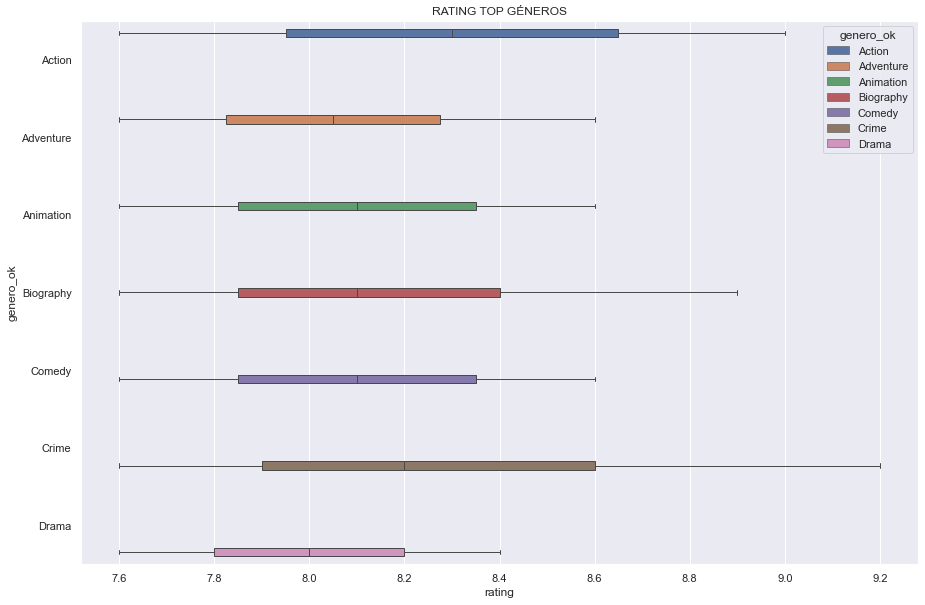

In [25]:
#Top géneros rating

df_imdb2 = df_imdb.groupby(['genero_ok', 'rating']).sum()
df_imdb2.reset_index(inplace=True)

plt.figure(figsize=(15,10))
sns.boxplot(data = df_imdb2[:80],
            x ='rating',
            y = 'genero_ok',
            hue = 'genero_ok',
            linewidth = 1)

plt.title('RATING TOP GÉNEROS');

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 7. TOP 10 por recaudación

A continuación, haremos unos treemaps donde veremos el top 10 por recaudacion del casting de las películas, su género y su director. 
Veremos claramente el peso de cada uno respecto a los demás.

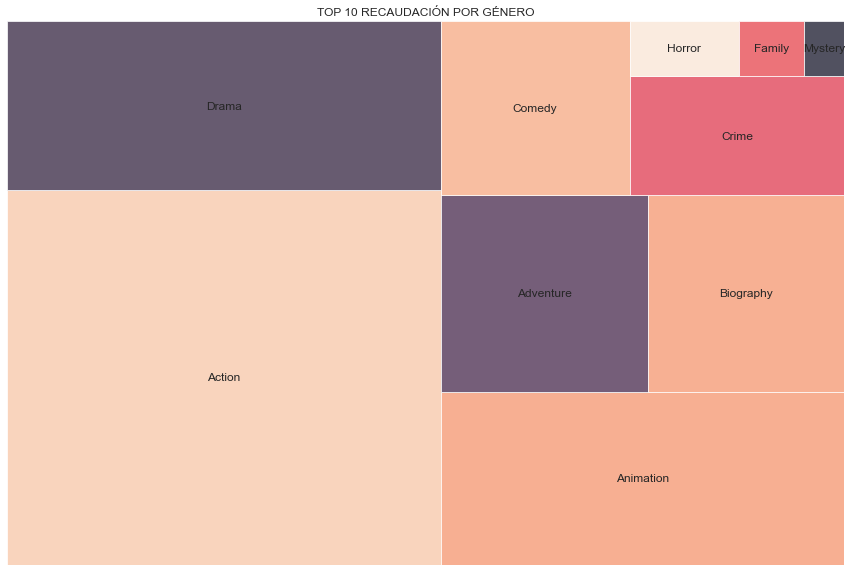

In [26]:
#GÉNERO POR RECAUDACIÓN

data_gnr = df_imdb.groupby("genero_ok").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_gnr.values,
            label =  data_gnr.index,
             alpha = 0.7,
             )

plt.axis('off');

plt.title('TOP 10 RECAUDACIÓN POR GÉNERO');

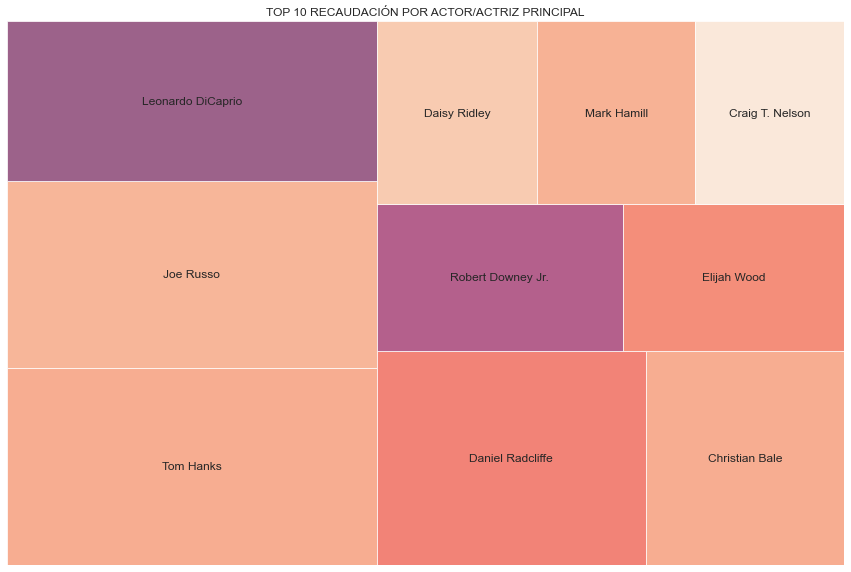

In [27]:
#ACTOR PRINCIPAL1 POR RECAUDACIÓN

data_str1 = df_imdb.groupby("star1").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_str1.values,
             label =  data_str1.index,
             alpha = .7)

plt.axis('off')

plt.title('TOP 10 RECAUDACIÓN POR ACTOR/ACTRIZ PRINCIPAL');

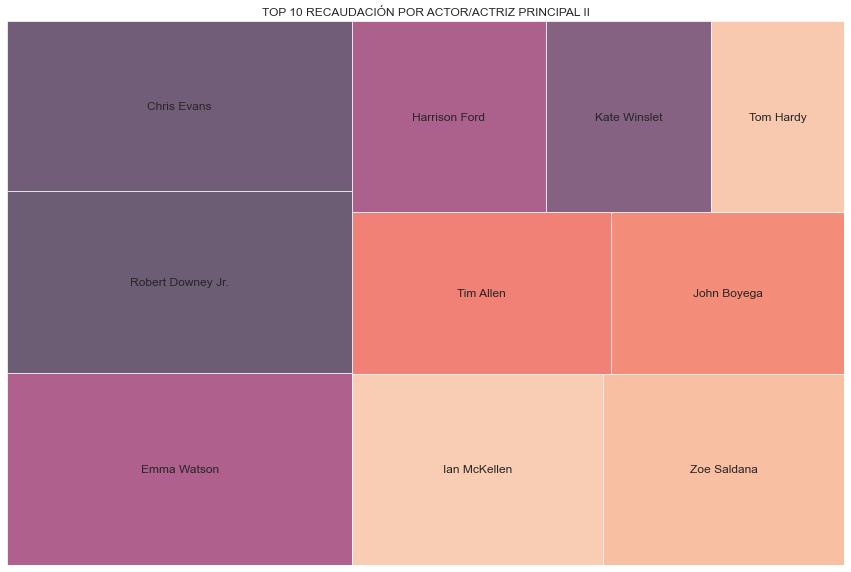

In [28]:
#ACTOR PRINCIPAL2 POR RECAUDACIÓN

data_str2 = df_imdb.groupby("star2").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_str2.values,
             label =  data_str2.index,
             alpha = .7)

plt.axis('off')

plt.title('TOP 10 RECAUDACIÓN POR ACTOR/ACTRIZ PRINCIPAL II');


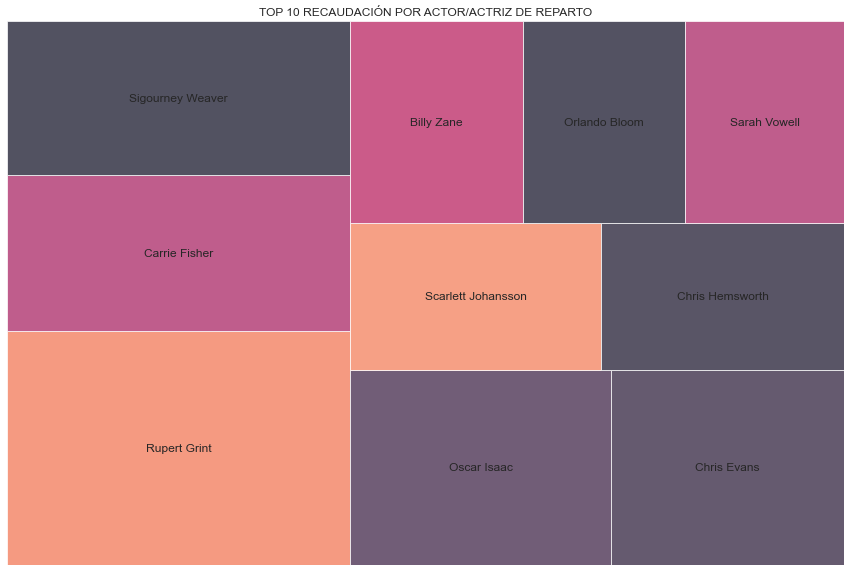

In [29]:
#ACTOR SECUNDARIO1 POR RECAUDACIÓN


data_str3 = df_imdb.groupby("star3").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_str3.values,
             label =  data_str3.index,
             alpha = .7)

plt.axis('off')

plt.title('TOP 10 RECAUDACIÓN POR ACTOR/ACTRIZ DE REPARTO');


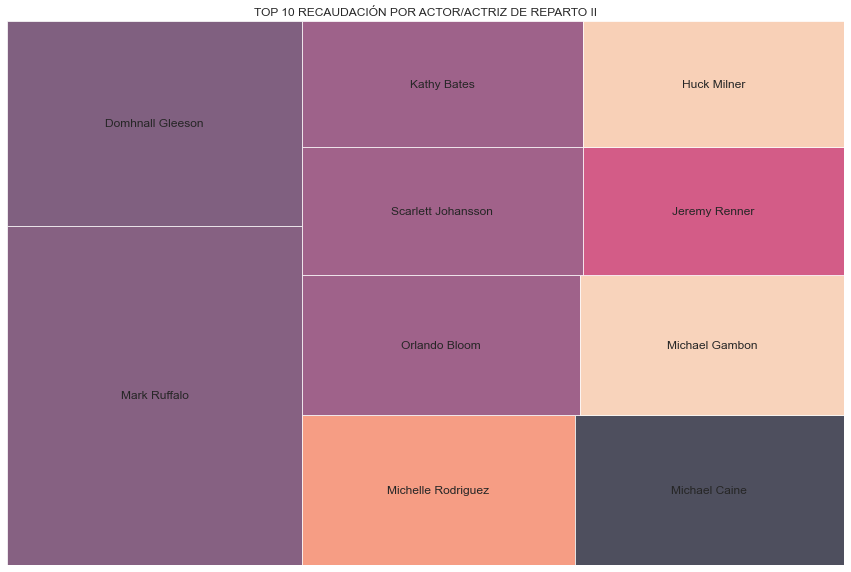

In [30]:
#ACTOR SECUNDARIO2 POR RECAUDACIÓN


data_str4 = df_imdb.groupby("star4").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_str4.values,
             label =  data_str4.index,
             alpha = .7)

plt.axis('off')

plt.title('TOP 10 RECAUDACIÓN POR ACTOR/ACTRIZ DE REPARTO II');


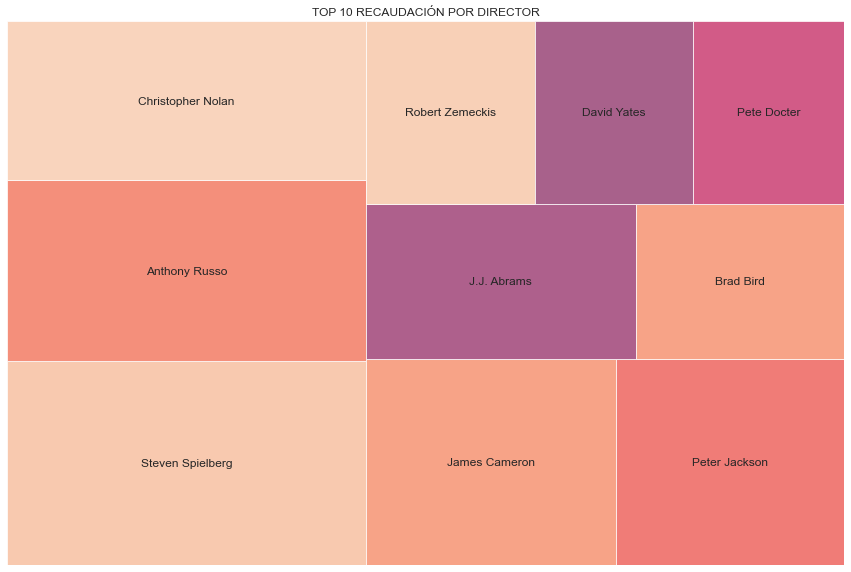

In [31]:
#DIRECTOR POR RECAUDACIÓN



data_dir = df_imdb.groupby("director").sum()['recaudacion'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))

squarify.plot(sizes = data_dir.values,
             label =  data_dir.index,
             alpha = .7)

plt.axis('off')

plt.title('TOP 10 RECAUDACIÓN POR DIRECTOR');


#### <a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 8. Tratamiento de texto

Como queremos saber qué influye para tener una película dentro del ranking, vamos a analizar los títulos de las películas.

Separamos los títulos de las películas en varias columnas, una por palabra.
Le aplicamos un filtro de limpieza donde quitaremos palabras que encontremos que no son en inglés y signos de puntuación que no aportan nada.
Despues del tratamiento de texto, añadimos todas las palabras a una lista y lo graficaremos en un wordmap para ver qué palabras tienen más peso en este ranking.

Es interesante ver que hay **4 grupos** bien marcados de palabras que funcionan:

>+ #### Negativas 
Blood, War, Death, Evil ...
>+ #### Positivas
Good, Baby ...
>+ #### Temporales 
Time, Day, Night, Midnight , Christmas ...
>+ #### Masculinas
Man, Men, King, Warrior ....




   

Para finalizar, vamos a hacer de nuevo esta lista sin palabras repetidas, para poder generar títulos de peliculas aleatoras de cara a un pequeño programa.



In [32]:
#Tratamiento de texto


df_imdb["Titulo"].str.split(expand=True)
Titulo = df_imdb["Titulo"].str.split(expand=True)
Titulo.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12','13']
df_imdb = pd.concat([df_imdb, Titulo], axis=1)

data_palabras = df_imdb.iloc[:, 14:27]

limpiar = lambda x: x.replace(".", None).replace("&", None) \
    .replace(" ", None).replace(":", None).replace("-", None) \
    .replace("Vol", None).replace(",", None).replace("V", None) \
    .replace("II", None).replace("X", None).replace("2", None) \
    .replace("Capharnaüm", None).replace("Shichinin", None).replace("Gisaengchung", None) \
    .replace("buono", None).replace("brutto", None).replace("cattivo", None) \
    .replace("no", None).replace("il", None).replace("nuovo", None) \
    .replace("La", None).replace("Le", None).replace("Das", None) \
    .replace("la", None).replace("Trois", None).replace("di", None) \
    .replace("les", None).replace("Serbuan", None).replace("de", None) \
    .replace("Der", None)

data_palabras = data_palabras.apply(limpiar)

palabras_1 = list(pd.value_counts(data_palabras['1']).index)
palabras_2 = list(pd.value_counts(data_palabras['2']).index)
palabras_3 = list(pd.value_counts(data_palabras['3']).index)
palabras_4 = list(pd.value_counts(data_palabras['4']).index)
palabras_5 = list(pd.value_counts(data_palabras['5']).index)
palabras_6 = list(pd.value_counts(data_palabras['6']).index)

metapalabras = palabras_1+palabras_2+palabras_3+palabras_4+palabras_5+palabras_6

def juntar_palabras(x, y):
    x.extend([element for element in y if element not in x])


    return x

juntar_palabras(palabras_1, palabras_2)
juntar_palabras(palabras_1, palabras_3)
juntar_palabras(palabras_1, palabras_4)
juntar_palabras(palabras_1, palabras_5)
juntar_palabras(palabras_1, palabras_6)


['The',
 'A',
 'Star',
 'All',
 'Harry',
 'Toy',
 'Before',
 'American',
 'In',
 'My',
 'Gone',
 'Captain',
 'Once',
 'Dawn',
 'Short',
 'Midnight',
 'True',
 'Il',
 'Blade',
 'Lost',
 'Big',
 'Empire',
 'Casino',
 'Sin',
 'Donnie',
 'Finding',
 'Black',
 'What',
 'One',
 'Loving',
 'Un',
 'Mr.',
 'Kaze',
 'Blood',
 'Guardians',
 'City',
 'Dead',
 'Kill',
 'Birdman',
 'Avengers:',
 'Road',
 'Les',
 'How',
 'Batman',
 'Night',
 'Halloween',
 'Moneyball',
 'Back',
 'Little',
 '12',
 'Per',
 'Inside',
 'Deadpool',
 'On',
 'Life',
 'No',
 'Good',
 'It',
 'Wreck-It',
 'Mad',
 'Being',
 'Die',
 '21',
 'Festen',
 'Delicatessen',
 'Control',
 'Wind',
 'JFK',
 'Cidade',
 'Apocalypto',
 'Edge',
 'Saving',
 'Braveheart',
 'Reservoir',
 'Se7en',
 'Gully',
 'Close',
 'Ford',
 'Mary',
 'Rogue',
 'Green',
 'Lawrence',
 "Carlito's",
 '50/50',
 'Under',
 'Boyz',
 'Straight',
 'Frost/Nixon',
 'Dirty',
 'Bohemian',
 'Sleepers',
 'Bridge',
 'E.T.',
 'Hotel',
 '300',
 'Cinderella',
 'Deliverance',
 'Vampir

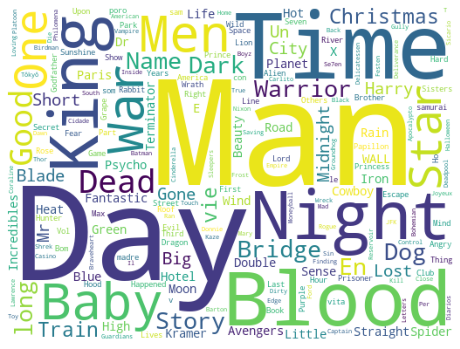

In [33]:
# DESPUÉS DEL TRATADO DE TEXTO GRAFICAMOS LAS PALABRAS QUE MÁS APARECEN


graficapalabras = metapalabras
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(metapalabras))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()


df_imdb.to_csv('IMDB_clean.csv')

<a href="#indice"><p style="text-align:right;" href="#indice">Volver al índice</p></a>

### 9. Conclusión final

Tras el análisis exploratorio, podemos decir firmemente que **no hay una formula casi perfecta para asegurar que un producto cinematográfico entre en el top 1000 IMDB**, al menos con los datos que disponemos.

Sin embargo, vemos ciertas tendencias que nos pueden ayudar a tomar un camino correcto.

Sabemos que una película tiene que rondar los 123 minutos.

Tenemos que tener en cuenta que para puntuar bien en el ranking no influye tanto lo que recaude nuestra película, sin embargo el género es fundamental, a demás de utilizar ciertas palabras trigger en el título de la película.

Si lo que queremos es un blockbuster y generar una buena recaudación, el género sigue influyendo mucho, pero inlfuye tambien el casting. Lo cual veremos en el programa Movie-Creator.





